# Reading file

In [1]:
import pandas as pd

In [2]:
file_path = 'booksummaries.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

# Data Analyze

In [3]:
def explore_text_content(content):
    num_characters = len(content)
    num_words = len(content.split())
    unique_words = set(content.split())
    num_unique_words = len(unique_words)       
    return num_characters, num_words, num_unique_words

num_characters, num_words, num_unique_words = explore_text_content(content)

In [4]:
print(f"Number of characters: {num_characters}")
print(f"Number of words: {num_words}")
print(f"Number of unique words: {num_unique_words}")

Number of characters: 43403998
Number of words: 7313903
Number of unique words: 379697


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m4tingh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m4tingh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
words = word_tokenize(content)
sentences = sent_tokenize(content)
stopWords = set(stopwords.words("english"))

In [7]:
fdist = FreqDist(words)
fdist.most_common(10)

[(',', 459684),
 ('the', 441251),
 ('.', 326359),
 ('to', 246217),
 ('and', 240876),
 ('of', 198934),
 ('a', 178633),
 ('is', 120096),
 ('in', 116285),
 ("''", 86302)]

In [8]:
filtered_words = [word for word in words if word.lower() not in stopWords and word.isalpha()]

fdist_filtered = FreqDist(filtered_words)
fdist_filtered.most_common(10)

[('one', 14971),
 ('time', 11103),
 ('also', 10752),
 ('two', 10404),
 ('life', 9822),
 ('novel', 9169),
 ('back', 9080),
 ('father', 8910),
 ('story', 8574),
 ('book', 8507)]

# Data Cleaning

In [9]:
freqTable = dict()
for word in words:
  word = word.lower()
  if word in stopWords:
    continue
  if word in freqTable:
    freqTable[word] += 1
  else:
    freqTable[word] = 1

sentences = content.split('.')
sentenceValue = dict()

for sentence in sentences:
    sentenceWords = word_tokenize(sentence)
    sentenceFreq = sum([freqTable.get(word.lower(), 0) for word in sentenceWords])
    if sentence not in sentenceValue:
        sentenceValue[sentence] = sentenceFreq

sumValues = sum(sentenceValue.values())
average = sumValues / len(sentenceValue) if len(sentenceValue) > 0 else 0

summaryword = ' '.join([sentence for sentence, value in sentenceValue.items() if value > (1.2 * average)])

# T5

In [10]:
import torch
from transformers import AutoTokenizer, AutoModelWithLMHead
tokenizer = AutoTokenizer.from_pretrained('t5-base')
model = AutoModelWithLMHead.from_pretrained('t5-base', return_dict=True)

C:\ProgramData\anaconda3\Lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\transformers\models\auto\modeling_auto.py:1468: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal la

In [11]:
inputs = tokenizer.encode("summarize: " + summaryword,
return_tensors='pt',
max_length=300,
truncation=True)

summary_ids = model.generate(inputs, max_length=120, min_length=80, length_penalty=5, num_beams=4, early_stopping=True, no_repeat_ngram_size=3)
summaryt5 = tokenizer.decode(summary_ids[0])

# Splitting each line into 7 words

In [12]:
words1 = summaryt5.split()
lines = [' '.join(words1[i:i+7]) for i in range(0, len(words1), 7)]

main_text = '\n'.join(lines)

main_text = main_text.replace('<pad>', '').replace('</s>', '')

# Summary output of the file

In [13]:
with open('summaries.txt', 'w') as file:
    file.write(main_text)

# Creating an image

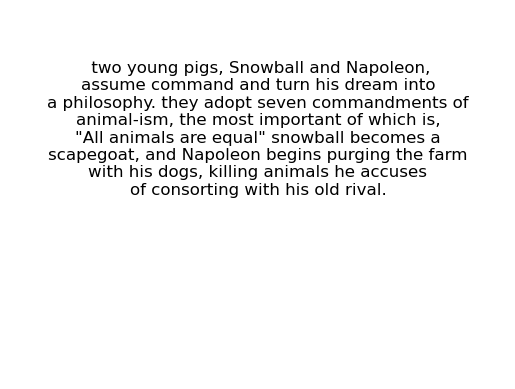


 done! :)


In [14]:
import matplotlib.pyplot as plt
import numpy as np

text = main_text
fig, ax = plt.subplots()
ax.text(0.5, 0.5, text, fontsize=12, ha='center')
ax.axis('off')
plt.savefig('image.png')
plt.show()

print("\n done! :)")

In [16]:
print('test')

test
